In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv(r"C:\Users\HP\Downloads\prepared_dataset.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   DATE                261 non-null    object 
 1   CSUSHPISA           261 non-null    float64
 2   Year                261 non-null    int64  
 3   Month               261 non-null    int64  
 4   Per_Capita_GDP      261 non-null    float64
 5   Working_Population  261 non-null    float64
 6   Houses              261 non-null    float64
 7   CPI                 261 non-null    float64
 8   UNRATE              261 non-null    float64
 9   Cons_Materials      261 non-null    float64
 10  FEDFUNDS            261 non-null    float64
dtypes: float64(8), int64(2), object(1)
memory usage: 22.6+ KB


In [4]:
data.head()

,DATE,CSUSHPISA,Year,Month,Per_Capita_GDP,Working_Population,Houses,CPI,UNRATE,Cons_Materials,FEDFUNDS
0,2002-01-01,117.144,2002,1,50091.000000,1.825664e+08,1632.0,205.1,5.7,142.0,1.73
1,2002-02-01,117.845,2002,2,50156.000000,1.827984e+08,1671.0,206.0,5.7,142.2,1.74
2,2002-03-01,118.687,2002,3,50221.000000,1.830783e+08,1559.0,206.3,5.7,143.2,1.73
3,2002-04-01,119.611,2002,4,50286.000000,1.832605e+08,1625.0,207.0,5.9,143.5,1.75
4,2002-05-01,120.724,2002,5,50311.333333,1.835082e+08,1705.0,207.4,5.8,143.8,1.75


In [5]:
data['DATE'] = pd.to_datetime(data.DATE)

In [6]:
data.dtypes

DATE                  datetime64[ns]
CSUSHPISA                    float64
Year                           int64
Month                          int64
Per_Capita_GDP               float64
Working_Population           float64
Houses                       float64
CPI                          float64
UNRATE                       float64
Cons_Materials               float64
FEDFUNDS                     float64
dtype: object

In [7]:
from ydata_profiling import ProfileReport
report = ProfileReport(data)
report.to_file(output_file='report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

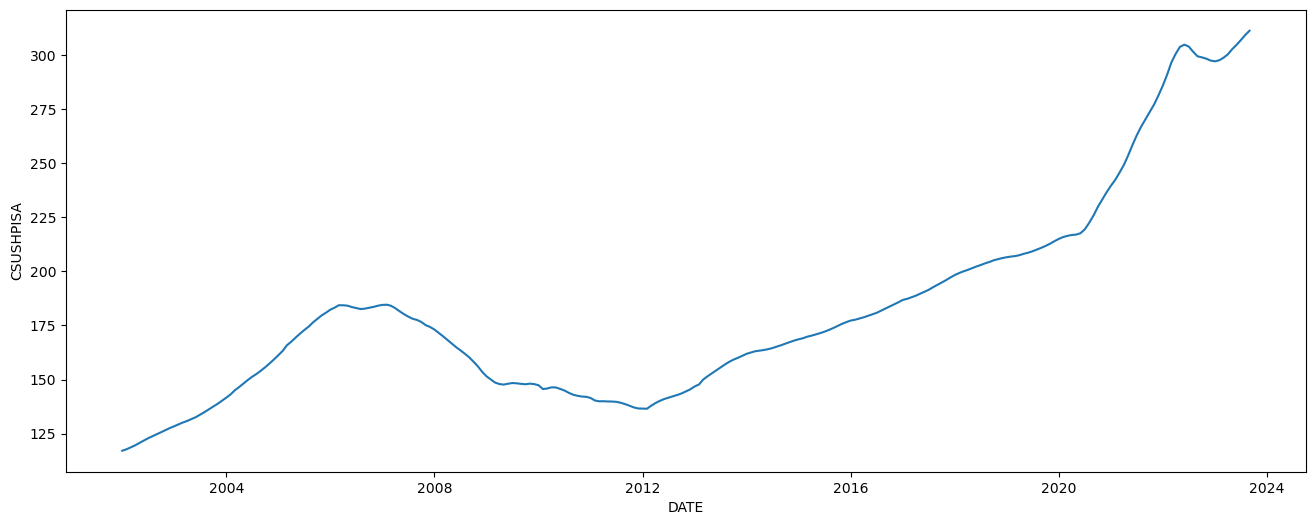

In [9]:
plt.figure(figsize=(16,6))
sns.lineplot(x=data.DATE,y=data.CSUSHPISA)
plt.show()

In [10]:
data_per_year = data.groupby(data["DATE"].dt.year).size()

In [11]:
data_per_year

DATE
2002    12
2003    12
2004    12
2005    12
2006    12
2007    12
2008    12
2009    12
2010    12
2011    12
2012    12
2013    12
2014    12
2015    12
2016    12
2017    12
2018    12
2019    12
2020    12
2021    12
2022    12
2023     9
dtype: int64

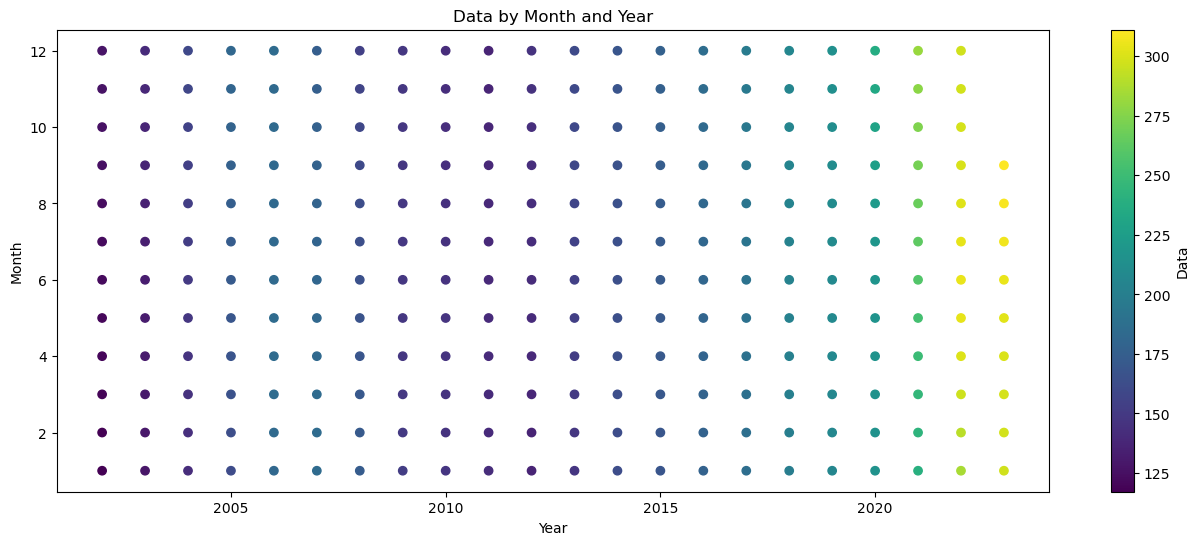

In [12]:
plt.figure(figsize=(16, 6))
plt.scatter(data["Year"], data["Month"], c=data["CSUSHPISA"], cmap="viridis")
plt.colorbar(label="Data")
plt.xlabel("Year")
plt.ylabel("Month")
plt.title("Data by Month and Year")
plt.show()

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


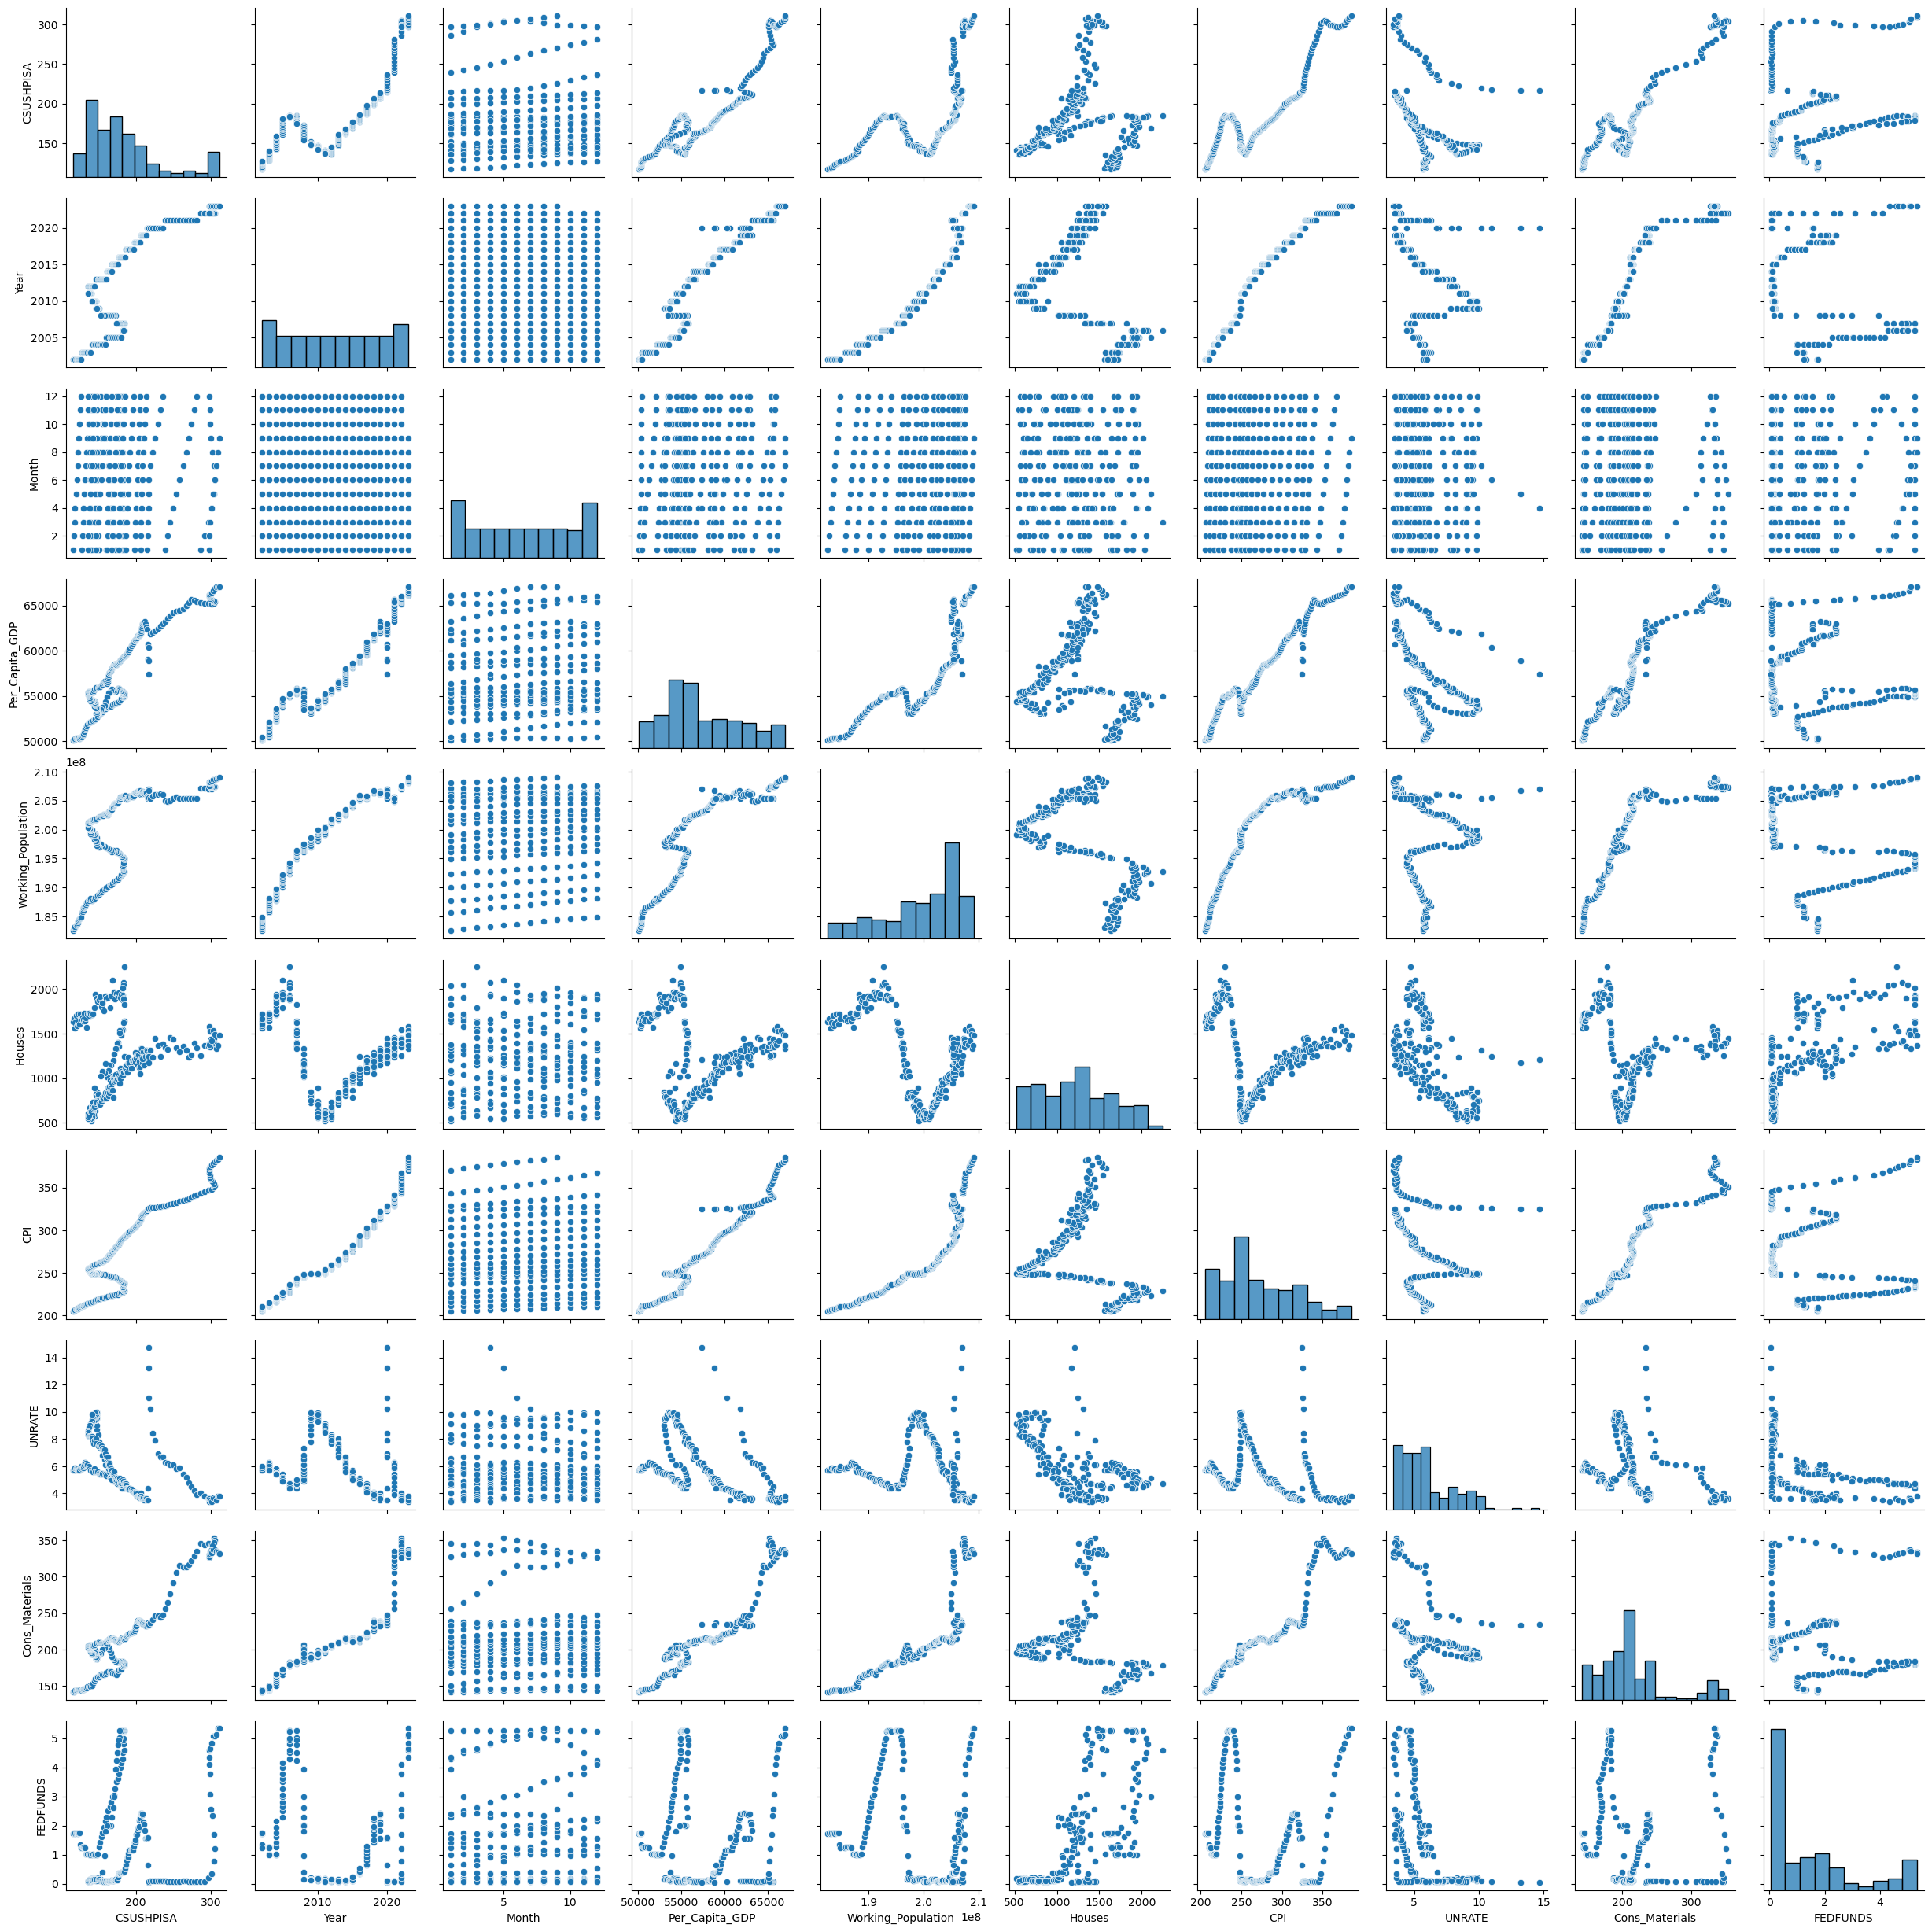

In [36]:
sns.pairplot(data)
plt.show()

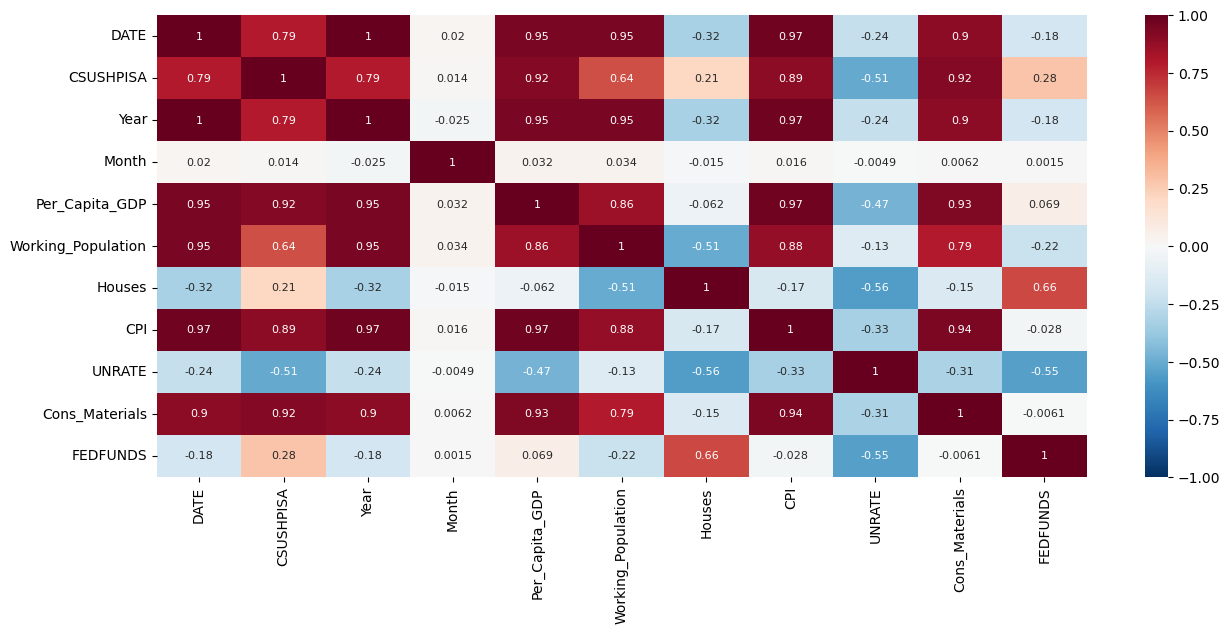

In [13]:
plt.figure(figsize=(15,6))
sns.heatmap(data.corr(), annot=True, cmap='RdBu_r', vmin=-1, vmax=1,annot_kws={"fontsize":8})
plt.show()

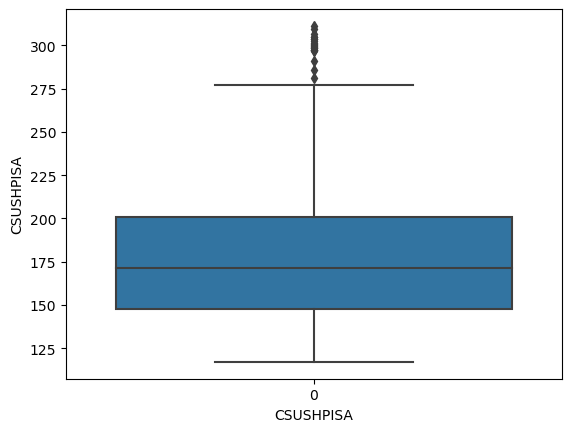

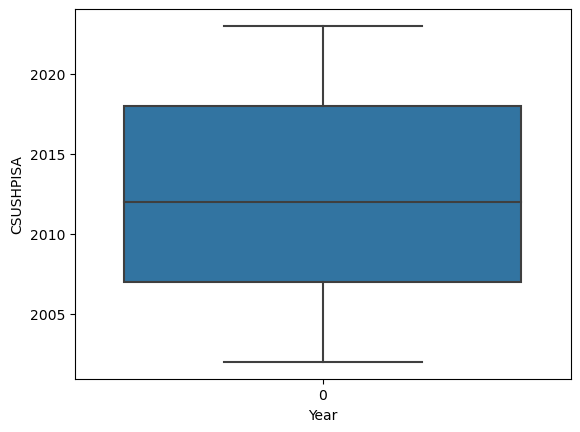

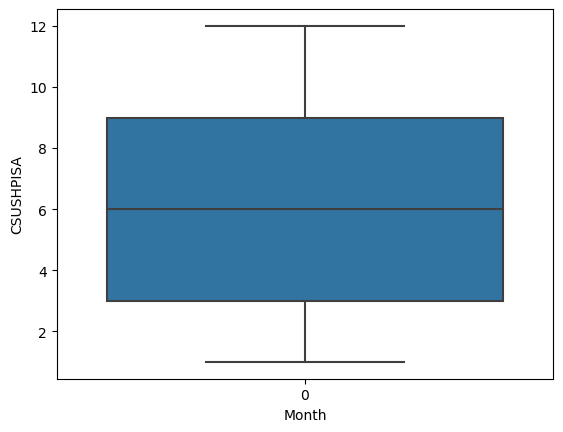

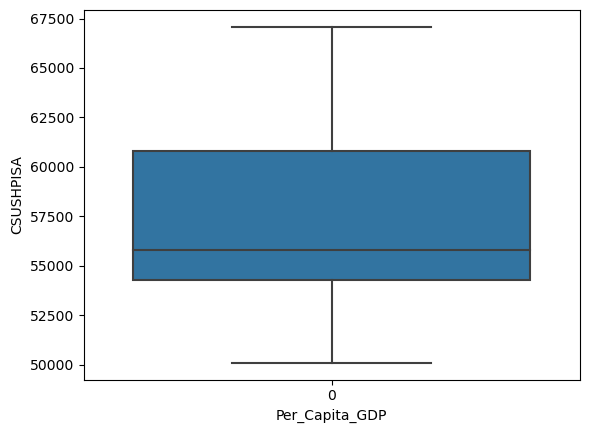

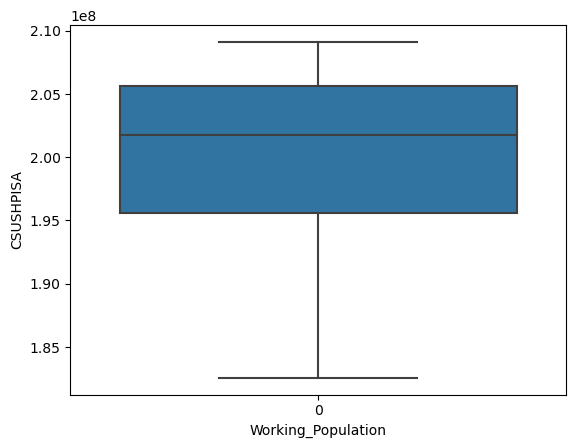

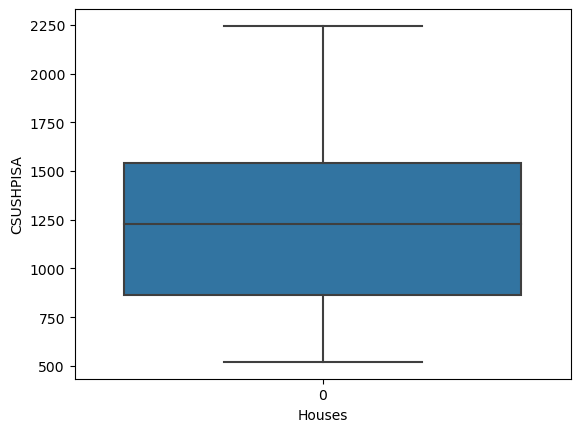

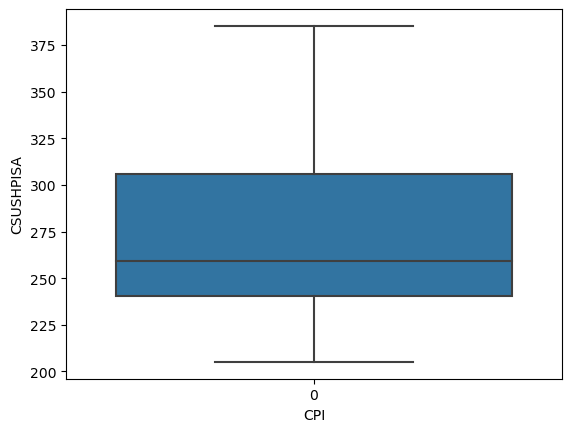

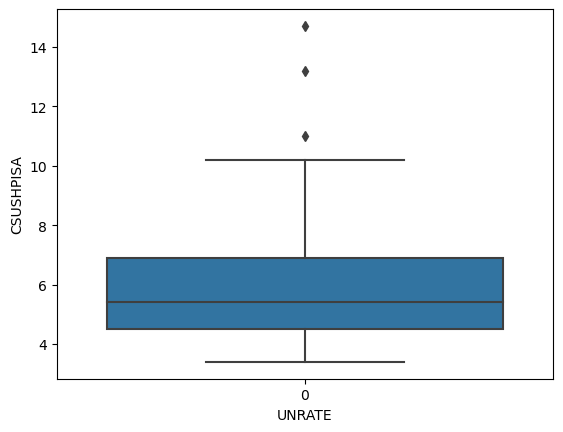

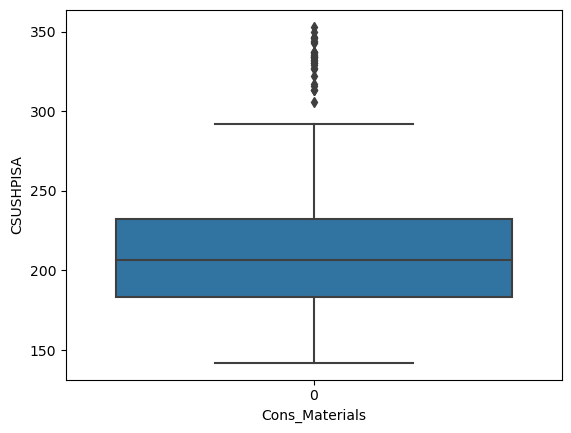

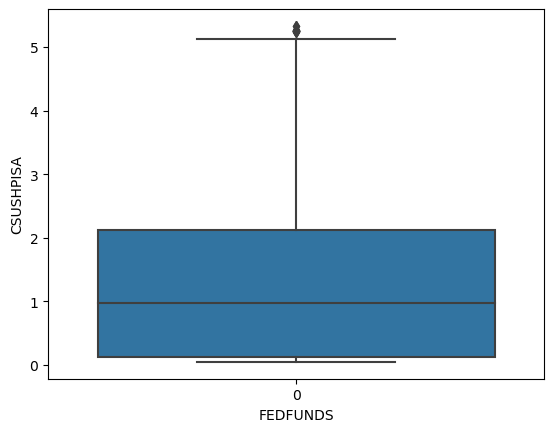

In [14]:
for i in data.iloc[:,1:].columns:
    sns.boxplot(data[i])
    plt.xlabel(i)
    plt.ylabel('CSUSHPISA')
    plt.show()

In [15]:
df = data[['DATE','CSUSHPISA']]

In [16]:
df = df.set_index('DATE')

In [17]:
df

,CSUSHPISA
DATE,
2002-01-01,117.144
2002-02-01,117.845
2002-03-01,118.687
2002-04-01,119.611
2002-05-01,120.724
...,...
2023-05-01,302.566
2023-06-01,304.593
2023-07-01,306.767


In [111]:
data.columns

Index(['DATE', 'CSUSHPISA', 'Year', 'Month', 'Per_Capita_GDP',
       'Working_Population', 'Houses', 'CPI', 'UNRATE', 'Cons_Materials',
       'FEDFUNDS'],
      dtype='object')

In [18]:
data.corr()['DATE']

DATE                  1.000000
CSUSHPISA             0.791172
Year                  0.998960
Month                 0.020151
Per_Capita_GDP        0.947568
Working_Population    0.951830
Houses               -0.324884
CPI                   0.973990
UNRATE               -0.240259
Cons_Materials        0.897255
FEDFUNDS             -0.181817
Name: DATE, dtype: float64

In [19]:
data.head()

,DATE,CSUSHPISA,Year,Month,Per_Capita_GDP,Working_Population,Houses,CPI,UNRATE,Cons_Materials,FEDFUNDS
0,2002-01-01,117.144,2002,1,50091.000000,1.825664e+08,1632.0,205.1,5.7,142.0,1.73
1,2002-02-01,117.845,2002,2,50156.000000,1.827984e+08,1671.0,206.0,5.7,142.2,1.74
2,2002-03-01,118.687,2002,3,50221.000000,1.830783e+08,1559.0,206.3,5.7,143.2,1.73
3,2002-04-01,119.611,2002,4,50286.000000,1.832605e+08,1625.0,207.0,5.9,143.5,1.75
4,2002-05-01,120.724,2002,5,50311.333333,1.835082e+08,1705.0,207.4,5.8,143.8,1.75


In [30]:
data.tail()

,DATE,CSUSHPISA,Year,Month,Per_Capita_GDP,Working_Population,Houses,CPI,UNRATE,Cons_Materials,FEDFUNDS
256,2023-05-01,302.566,2023,5,66588.333333,2.086128e+08,1534.0,378.622,3.7,337.473,5.06
257,2023-06-01,304.593,2023,6,66835.666667,2.087069e+08,1492.0,380.006,3.6,337.336,5.08
258,2023-07-01,306.767,2023,7,67083.000000,2.087792e+08,1334.0,381.681,3.5,334.576,5.12
259,2023-08-01,309.155,2023,8,67083.000000,2.089066e+08,1370.0,382.782,3.8,333.980,5.33
260,2023-09-01,311.175,2023,9,67083.000000,2.091172e+08,1478.0,385.259,3.8,332.224,5.33


In [23]:
AVG_CSUSHISA_Per_Month = data.groupby("Month")["CSUSHPISA"].mean().reset_index()
AVG_CSUSHISA_Per_Month

,Month,CSUSHPISA
0,1,179.516773
1,2,180.141500
2,3,181.075636
3,4,181.878318
4,5,182.694227
5,6,183.430773
6,7,184.138500
7,8,184.801500
8,9,185.523318
9,10,180.267190


In [26]:
px.bar(x=AVG_CSUSHISA_Per_Month.Month,y=AVG_CSUSHISA_Per_Month.CSUSHPISA)

In [27]:
AVG_CSUSHISA_Per_Year = data.groupby("Year")["CSUSHPISA"].mean().reset_index()
AVG_CSUSHISA_Per_Year

,Year,CSUSHPISA
0,2002,122.279250
1,2003,133.731333
2,2004,150.440250
3,2005,171.737000
4,2006,183.447500
5,2007,179.918917
6,2008,164.057417
7,2009,148.545083
8,2010,144.674500
9,2011,139.259500


In [29]:
px.bar(x=AVG_CSUSHISA_Per_Year.Year,y=AVG_CSUSHISA_Per_Year.CSUSHPISA)

2023 have only 9 months data

In [32]:
data.corr()

,DATE,CSUSHPISA,Year,Month,Per_Capita_GDP,Working_Population,Houses,CPI,UNRATE,Cons_Materials,FEDFUNDS
DATE,1.000000,0.791172,0.998960,0.020151,0.947568,0.951830,-0.324884,0.973990,-0.240259,0.897255,-0.181817
CSUSHPISA,0.791172,1.000000,0.790461,0.013694,0.917873,0.642338,0.209174,0.890775,-0.512337,0.920002,0.284548
Year,0.998960,0.790461,1.000000,-0.025456,0.946013,0.950171,-0.324174,0.973169,-0.240022,0.896874,-0.181824
Month,0.020151,0.013694,-0.025456,1.000000,0.031720,0.033834,-0.014579,0.015534,-0.004918,0.006171,0.001472
Per_Capita_GDP,0.947568,0.917873,0.946013,0.031720,1.000000,0.855210,-0.061822,0.973358,-0.471342,0.930651,0.068829
Working_Population,0.951830,0.642338,0.950171,0.033834,0.855210,1.000000,-0.505890,0.881400,-0.131772,0.794638,-0.224273
Houses,-0.324884,0.209174,-0.324174,-0.014579,-0.061822,-0.505890,1.000000,-0.171440,-0.558396,-0.145780,0.658246
CPI,0.973990,0.890775,0.973169,0.015534,0.973358,0.881400,-0.171440,1.000000,-0.328392,0.942186,-0.027740
UNRATE,-0.240259,-0.512337,-0.240022,-0.004918,-0.471342,-0.131772,-0.558396,-0.328392,1.000000,-0.314488,-0.547038
Cons_Materials,0.897255,0.920002,0.896874,0.006171,0.930651,0.794638,-0.145780,0.942186,-0.314488,1.000000,-0.006130


In [33]:
data.head()

,DATE,CSUSHPISA,Year,Month,Per_Capita_GDP,Working_Population,Houses,CPI,UNRATE,Cons_Materials,FEDFUNDS
0,2002-01-01,117.144,2002,1,50091.000000,1.825664e+08,1632.0,205.1,5.7,142.0,1.73
1,2002-02-01,117.845,2002,2,50156.000000,1.827984e+08,1671.0,206.0,5.7,142.2,1.74
2,2002-03-01,118.687,2002,3,50221.000000,1.830783e+08,1559.0,206.3,5.7,143.2,1.73
3,2002-04-01,119.611,2002,4,50286.000000,1.832605e+08,1625.0,207.0,5.9,143.5,1.75
4,2002-05-01,120.724,2002,5,50311.333333,1.835082e+08,1705.0,207.4,5.8,143.8,1.75


In [86]:
fig = px.scatter(data_frame=data, x='Houses', y='Per_Capita_GDP')
fig.update_layout(title='Scatter plot of Houses vs Per_Capita_GDP')
fig.show()

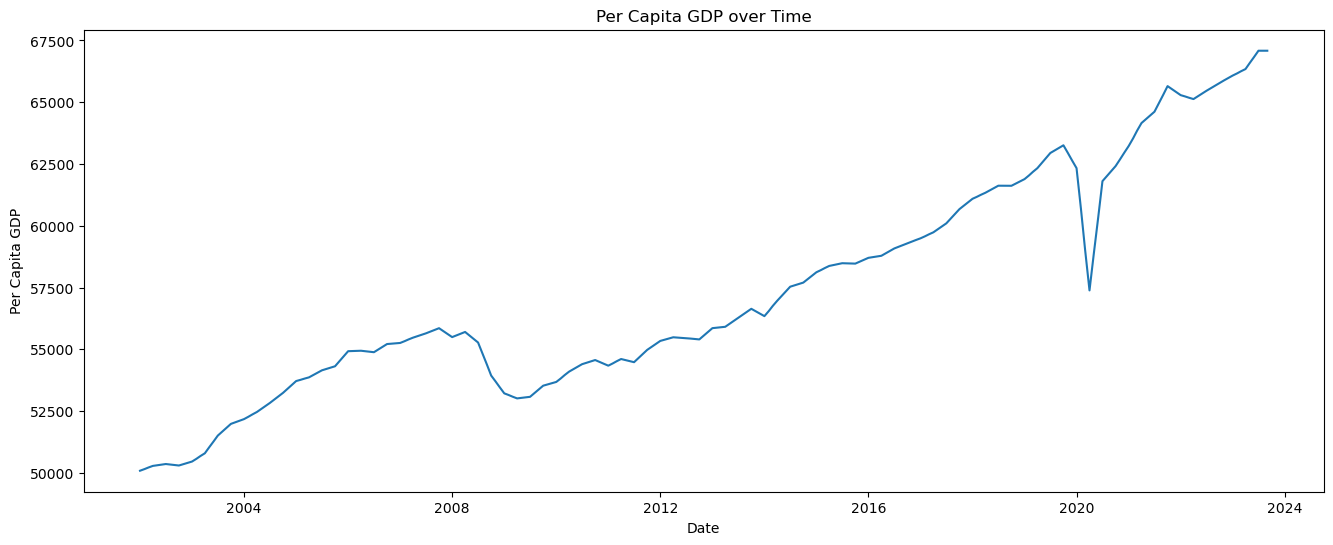

In [54]:
plt.figure(figsize=(16, 6))
plt.plot(data.DATE, data.Per_Capita_GDP)
plt.title("Per Capita GDP over Time")
plt.xlabel("Date")
plt.ylabel("Per Capita GDP")
plt.show()

In [90]:
fig = px.line(data_frame=data, x='DATE', y=['FEDFUNDS', 'UNRATE', 'Cons_Materials'])
fig.update_layout(title='Line plot of FEDFUNDS, UNRATE, and Cons_Materials over time')
fig.show()

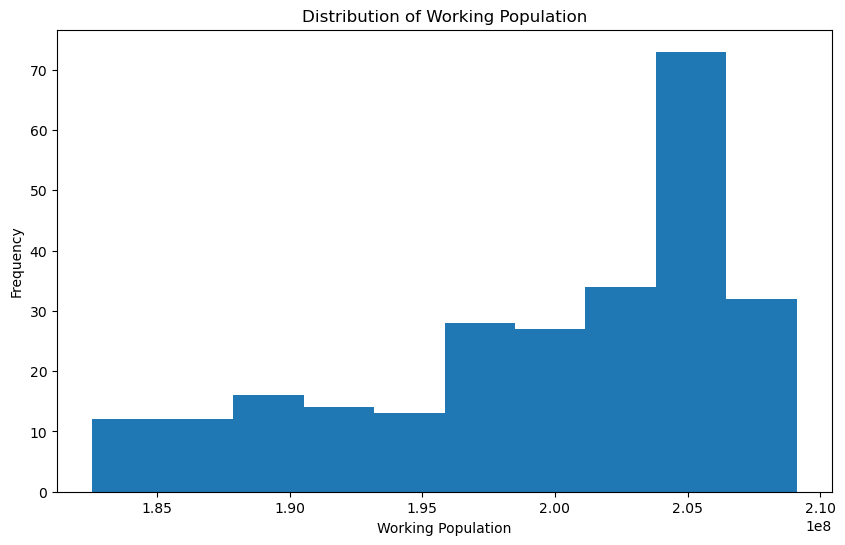

In [52]:
plt.figure(figsize=(10, 6))
plt.hist(data.Working_Population)
plt.title("Distribution of Working Population")
plt.xlabel("Working Population")
plt.ylabel("Frequency")
plt.show()

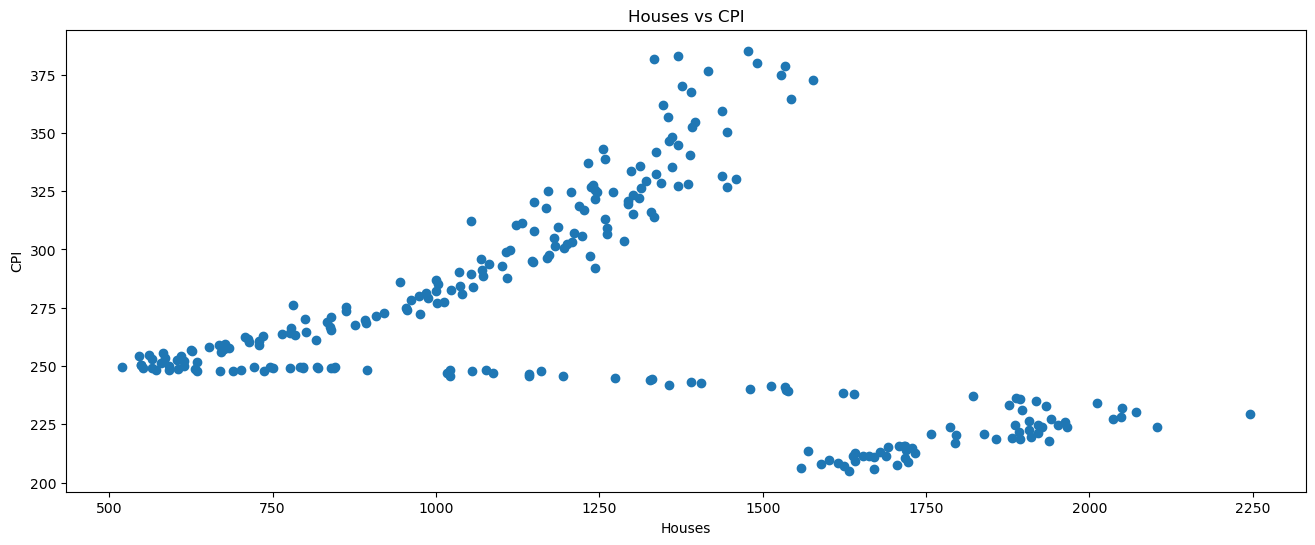

In [51]:
plt.figure(figsize=(16, 6))
plt.scatter(data.Houses, data.CPI)
plt.title("Houses vs CPI")
plt.xlabel("Houses")
plt.ylabel("CPI")
plt.show()

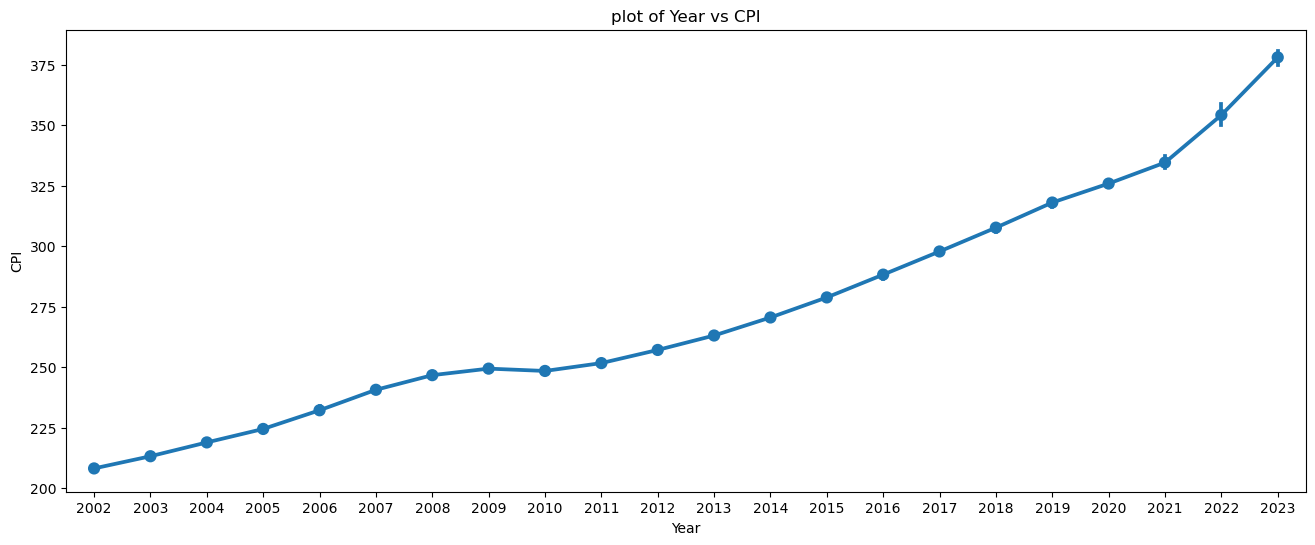

In [87]:
fig, ax = plt.subplots(figsize=(16, 6))
sns.pointplot(data=data, x='Year', y='CPI',ax=ax)
plt.title('plot of Year vs CPI')
plt.xticks(rotation=0)
plt.show()

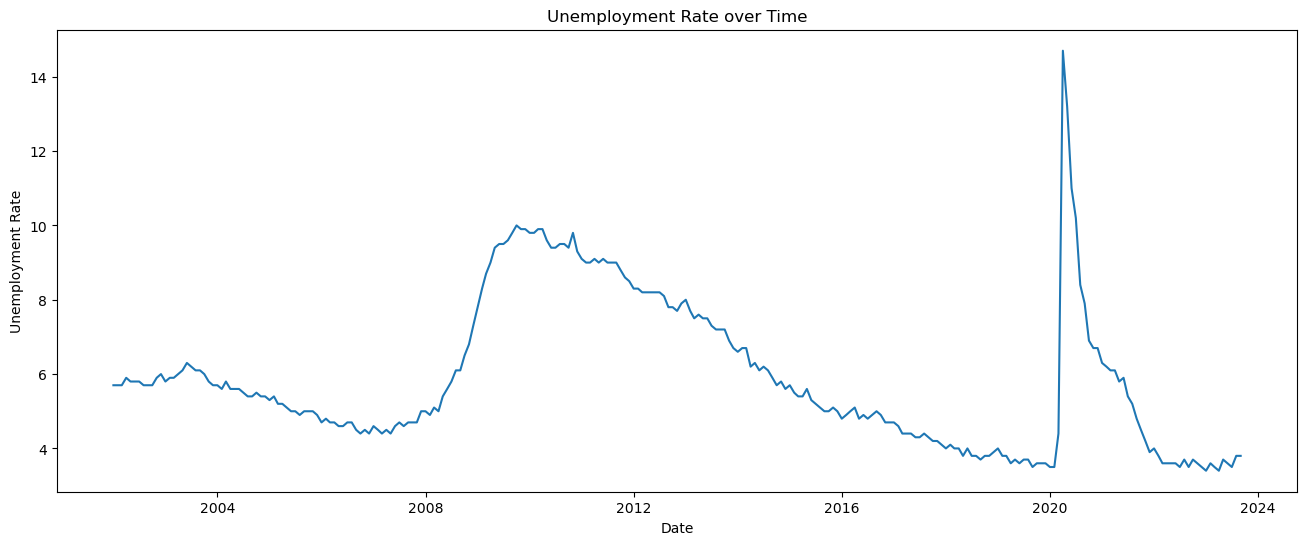

In [49]:
plt.figure(figsize=(16, 6))
plt.plot(data.DATE, data.UNRATE)
plt.title("Unemployment Rate over Time")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate")
plt.show()

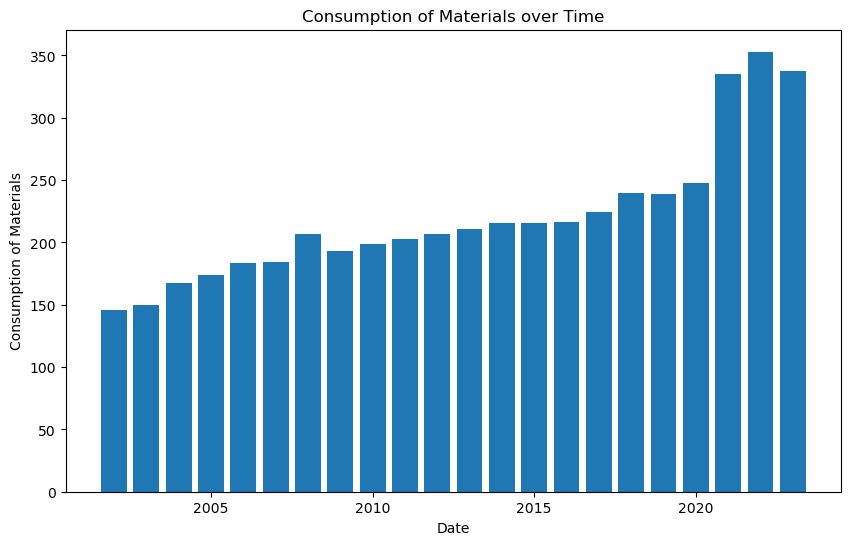

In [59]:
plt.figure(figsize=(10, 6))
plt.bar(data["Year"], data["Cons_Materials"])
plt.title("Consumption of Materials over Time")
plt.xlabel("Date")
plt.ylabel("Consumption of Materials")
plt.show()

# MODEL

In [93]:
df = data[['DATE','CSUSHPISA']]
df = df.set_index('DATE')
df

,CSUSHPISA
DATE,
2002-01-01,117.144
2002-02-01,117.845
2002-03-01,118.687
2002-04-01,119.611
2002-05-01,120.724
...,...
2023-05-01,302.566
2023-06-01,304.593
2023-07-01,306.767


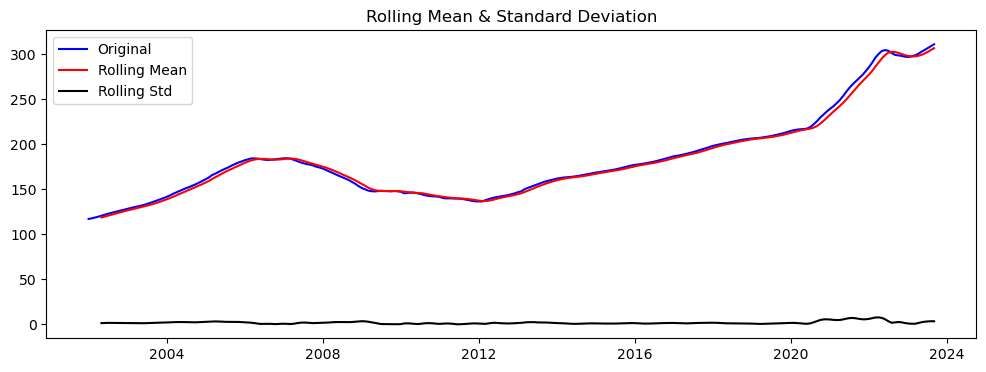

Results of Dickey-Fuller Test:
Test Statistic                  -0.097850
p-value                          0.949652
#Lags Used                      14.000000
Number of Observations Used    246.000000
Critical Value (1%)             -3.457215
Critical Value (5%)             -2.873362
Critical Value (10%)            -2.573070
dtype: float64


In [61]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=5,center=False).mean() 
    rolstd = timeseries.rolling(window=5,center=False).std()
    #Plot rolling statistics:
    plt.figure(figsize=(12,4))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
test_stationarity(df)

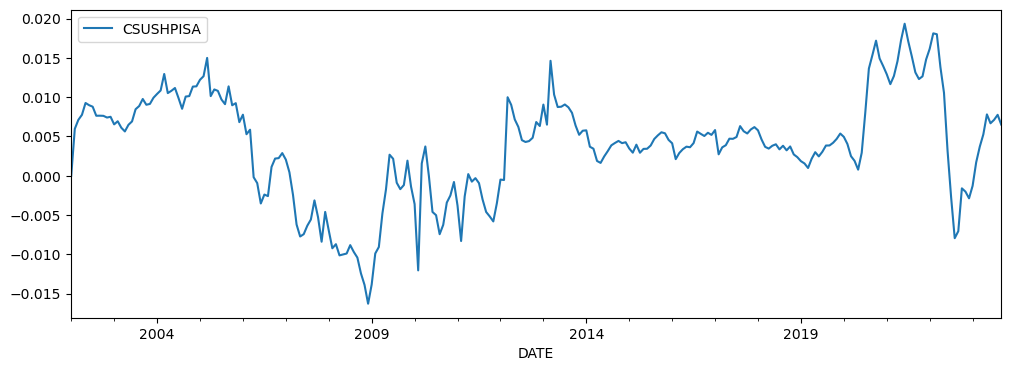

In [62]:
df_log = np.log(df + 1e-8) # add a small constant to avoid zero or negative values)
df_log_diff = df_log - df_log.shift()
df_log_diff = df_log_diff.fillna(1e-8)
df_log_diff.plot(figsize=(12,4))
plt.show()

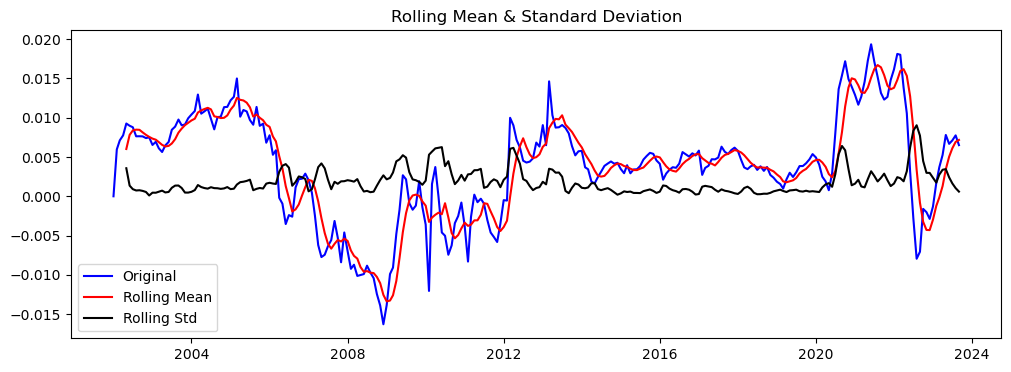

Results of Dickey-Fuller Test:
Test Statistic                  -2.269737
p-value                          0.181914
#Lags Used                      13.000000
Number of Observations Used    247.000000
Critical Value (1%)             -3.457105
Critical Value (5%)             -2.873314
Critical Value (10%)            -2.573044
dtype: float64


In [63]:
test_stationarity(df_log_diff)

for future calculation data is non-stationary time series wouldn't be the best approach:  also here we need to find past 20 years not future 

In [91]:
data.head()

,DATE,CSUSHPISA,Year,Month,Per_Capita_GDP,Working_Population,Houses,CPI,UNRATE,Cons_Materials,FEDFUNDS
0,2002-01-01,117.144,2002,1,50091.000000,1.825664e+08,1632.0,205.1,5.7,142.0,1.73
1,2002-02-01,117.845,2002,2,50156.000000,1.827984e+08,1671.0,206.0,5.7,142.2,1.74
2,2002-03-01,118.687,2002,3,50221.000000,1.830783e+08,1559.0,206.3,5.7,143.2,1.73
3,2002-04-01,119.611,2002,4,50286.000000,1.832605e+08,1625.0,207.0,5.9,143.5,1.75
4,2002-05-01,120.724,2002,5,50311.333333,1.835082e+08,1705.0,207.4,5.8,143.8,1.75


In [158]:
y = data.CSUSHPISA

In [159]:
x=data.drop(['DATE','CSUSHPISA'],axis=1)#we have year and months

In [160]:
y.head()

0    117.144
1    117.845
2    118.687
3    119.611
4    120.724
Name: CSUSHPISA, dtype: float64

In [161]:
x.head()

,Year,Month,Per_Capita_GDP,Working_Population,Houses,CPI,UNRATE,Cons_Materials,FEDFUNDS
0,2002,1,50091.000000,1.825664e+08,1632.0,205.1,5.7,142.0,1.73
1,2002,2,50156.000000,1.827984e+08,1671.0,206.0,5.7,142.2,1.74
2,2002,3,50221.000000,1.830783e+08,1559.0,206.3,5.7,143.2,1.73
3,2002,4,50286.000000,1.832605e+08,1625.0,207.0,5.9,143.5,1.75
4,2002,5,50311.333333,1.835082e+08,1705.0,207.4,5.8,143.8,1.75


In [162]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [163]:
X_train=scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

In [164]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import model_selection

In [165]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=15)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((208, 9), (53, 9), (208,), (53,))

In [166]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score, KFold



models = [
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    XGBRegressor(),
]

results = []
names = []
kfold = KFold(n_splits=10, shuffle=True, random_state=15)

for model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='r2')
    results.append(cv_results)
    names.append(type(model).__name__)
    print(f'{type(model).__name__} - R^2: {np.mean(cv_results):.3f} ({np.std(cv_results):.3f})')

LinearRegression - R^2: 0.984 (0.011)
DecisionTreeRegressor - R^2: 0.996 (0.002)
RandomForestRegressor - R^2: 0.997 (0.001)
GradientBoostingRegressor - R^2: 0.997 (0.002)
XGBRegressor - R^2: 0.997 (0.002)


#### Feature Selection

In [167]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
model = LinearRegression()

rfe = RFE(model)
rfe = rfe.fit(x, y)

# Print the selected features
selected_features = x.columns[rfe.support_]
print("Selected features: ", selected_features)

Selected features:  Index(['Year', 'CPI', 'UNRATE', 'FEDFUNDS'], dtype='object')


In [168]:
x_r = data[['Year', 'CPI', 'UNRATE', 'FEDFUNDS']]

In [169]:
from sklearn.model_selection import train_test_split
X_r_train,X_test,y_train,y_test=train_test_split(x_r,y,test_size=.2,random_state=15)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((208, 9), (53, 4), (208,), (53,))

In [170]:
results = []
names = []
kfold = KFold(n_splits=10, shuffle=True, random_state=15)

for model in models:
    cv_results = cross_val_score(model, X_r_train, y_train, cv=kfold, scoring='r2')
    results.append(cv_results)
    names.append(type(model).__name__)
    print(f'{type(model).__name__} - R^2: {np.mean(cv_results):.3f} ({np.std(cv_results):.3f})')

LinearRegression - R^2: 0.904 (0.025)
DecisionTreeRegressor - R^2: 0.996 (0.004)
RandomForestRegressor - R^2: 0.998 (0.002)
GradientBoostingRegressor - R^2: 0.997 (0.001)
XGBRegressor - R^2: 0.997 (0.001)


Random Forest, Gradient Boosting, and XGBoost are three excellent models. Random Forest has the highest accuracy, while both boosting algorithms have low variance for accuracy.  Choose Random Forest if we worried about overfitting otherwise, consider a boosting algorithm.

I am choosing Random Forest as the best model because it has the highest accuracy. Additionally, Random Forest uses a bagging method, which significantly reduces the chance of overfitting due to the difference in accuracy and variance. Overfitting is not a concern here, and Random Forest also offers faster computational speed compared to the other two boosting algorithms.

In [173]:
RF = RandomForestRegressor().fit(X_r_train,y_train)

In [177]:
y_pred = RF.predict(X_test)

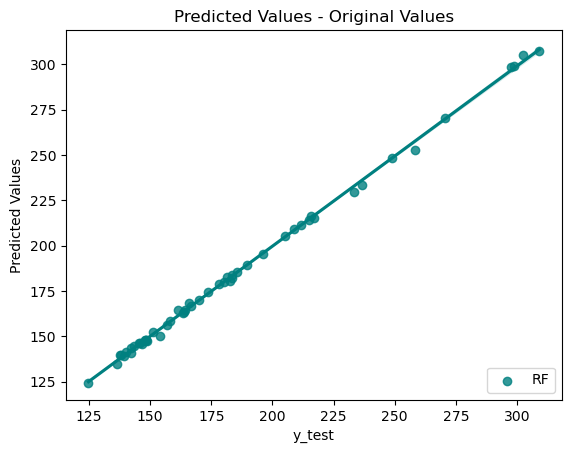

In [184]:
sns.regplot(x=y_test, y=y_pred, color='Teal',label=='RF')
plt.title('Predicted Values - Original Values')
plt.xlabel('y_test')
plt.ylabel('Predicted Values')
plt.legend(loc=4)
plt.show()

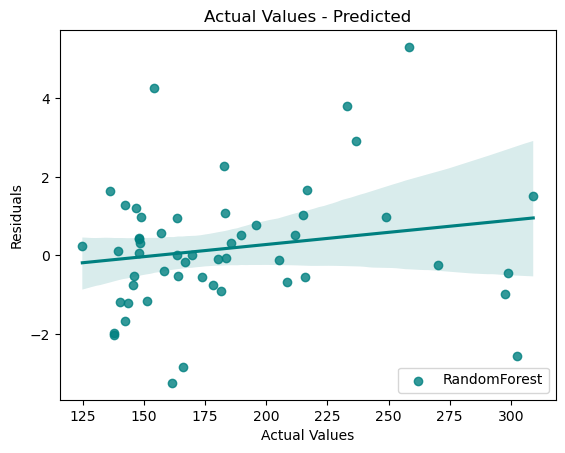

In [187]:
sns.regplot(x= y_test, y= y_test-y_pred, color='Teal',label='RandomForest')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Actual Values - Predicted')
plt.legend(loc=4)
plt.show()

In [203]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9988453069403687

In [189]:
from sklearn.model_selection import RandomizedSearchCV

In [190]:
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [191]:
rf_random = RandomizedSearchCV(
    estimator=RandomForestRegressor(),
    param_distributions=param_grid,
    n_iter=100,
    cv=5  
)

In [192]:
rf_random.fit(X_r_train, y_train)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning:


155 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
155 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\HP\anaconda3\Lib\site-packages\sklearn\uti

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   param_distributions={'max_depth': [5, 10, 20],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 500]})

In [194]:
best_params = rf_random.best_params_
print("Best parameters:", best_params)

Best parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 20}


In [204]:
RF2 = RandomForestRegressor(n_estimators= 200, min_samples_split= 2, min_samples_leaf= 1, max_features= 'log2', max_depth= 20)

In [205]:
RF2.fit(X_r_train,y_train)

RandomForestRegressor(max_depth=20, max_features='log2', n_estimators=200)

In [206]:
y_pred2 = RF2.predict(X_test)

In [207]:
r2_score(y_test, y_pred2)

0.99854416474189

This is the best parameter set, resulting in an accuracy of 99.8%.

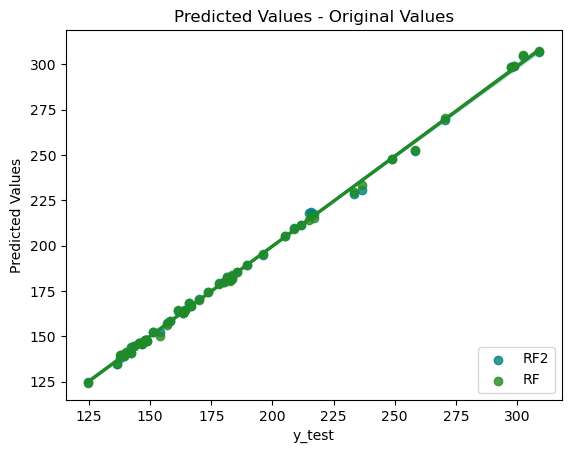

In [213]:
sns.regplot(x=y_test, y=y_pred2, color='Teal',label='RF2')
sns.regplot(x=y_test, y=y_pred, color='forestgreen',label='RF')
plt.title('Predicted Values - Original Values')
plt.xlabel('y_test')
plt.ylabel('Predicted Values')
plt.legend(loc=4)
plt.show()

In [215]:
import pickle
filename = 'CSUSHPISA.sav'
pickle.dump(RF2,open(filename,'wb'))